In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
dataset = pd.read_csv('/content/gdrive/MyDrive/BSc Project/insurance.csv')

In [ ]:
 dataset.shape

(1338, 7)

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
genderGps = dataset.groupby('sex').size()
print(genderGps)
smokerGps = dataset.groupby('smoker').size()
print(smokerGps)
regionGps = dataset.groupby('region').size()
print(regionGps)
childGp = dataset.groupby('children').size()
print(childGp)


sex
female    662
male      676
dtype: int64
smoker
no     1064
yes     274
dtype: int64
region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


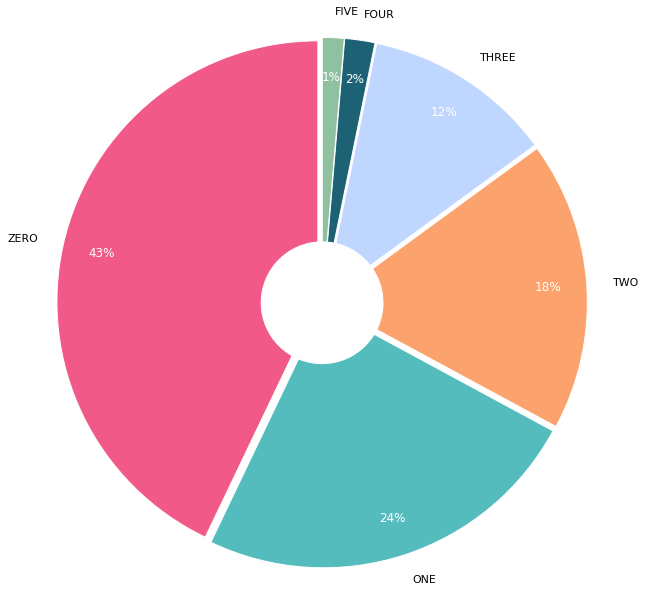

In [ ]:
# BMIGPGP.plot.pie()


# Pie chart
labels = ['ZERO', 'ONE', 'TWO', 'THREE', 'FOUR', 'FIVE']
sizes = [574, 324, 240, 157,25, 18 ]
#colors
colors = ['#f05988','#55bcbd','#fba26d','#bfd6ff','#1c6274', '#8fc09f']
#explsion
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
patches, texts, autotexts =plt.pie(sizes, colors = colors, labels=labels, startangle=90, autopct='%1.0f%%',pctdistance=0.85, explode = explode, radius=3)
#draw circle
for text in texts:
    text.set_color('black')

for autotext in autotexts:
    autotext.set_color('white')


centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
# ax1.axis('equal')
plt.tight_layout()
plt.show()



In [ ]:
# dataset.drop(["region"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


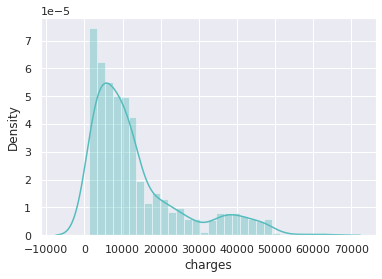

In [ ]:
sns.distplot(dataset['charges'], color = "#55bcbd")

In [ ]:
# sns.pairplot(dataset, palette='YlGnBu_r');

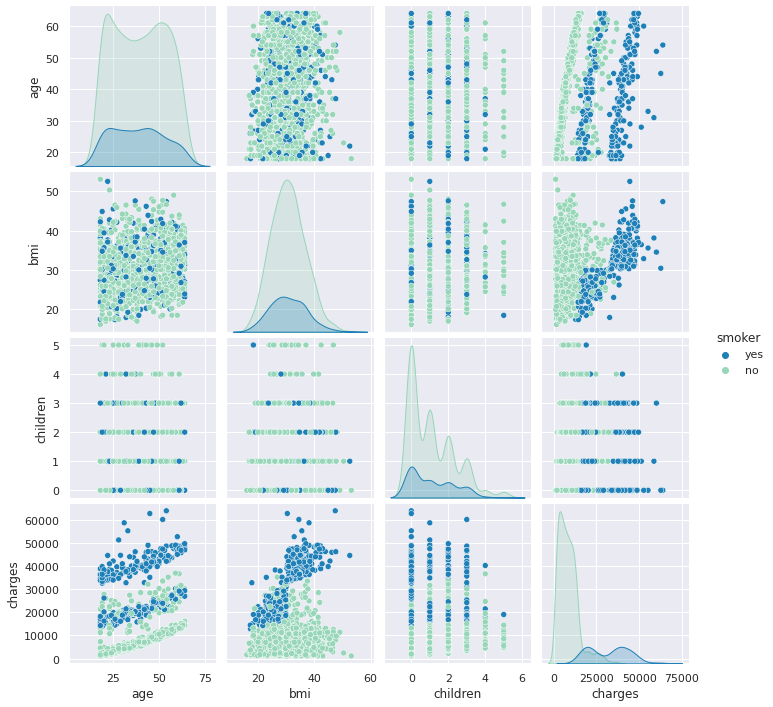

In [ ]:
sns.pairplot(dataset, palette='YlGnBu_r', hue='smoker');

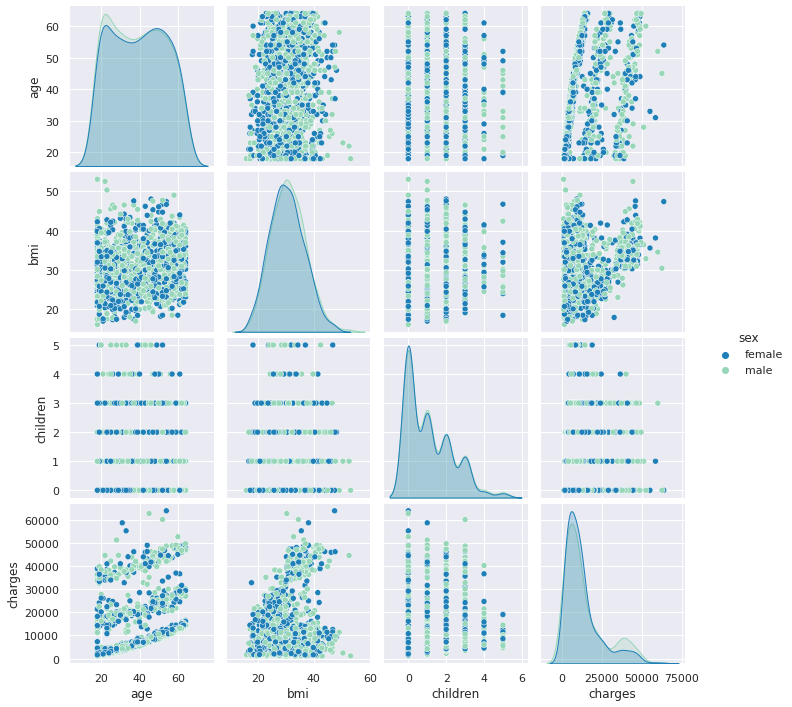

In [ ]:
sns.pairplot(dataset, palette='YlGnBu_r', hue='sex');

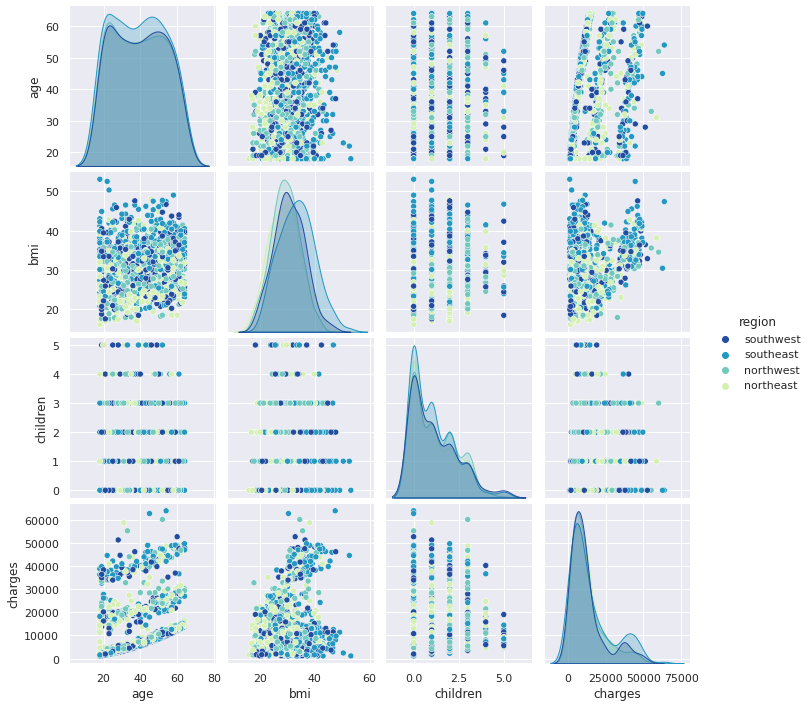

In [ ]:
sns.pairplot(dataset, palette='YlGnBu_r', hue='region');

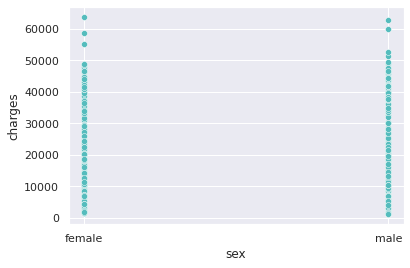

In [ ]:
sns.scatterplot(x=dataset['sex'], y=dataset['charges'], color = "#55bcbd");

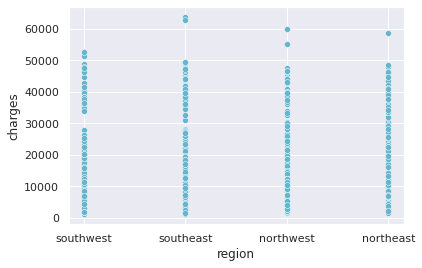

In [ ]:
sns.scatterplot(x=dataset['region'], y=dataset['charges'], color = "c");

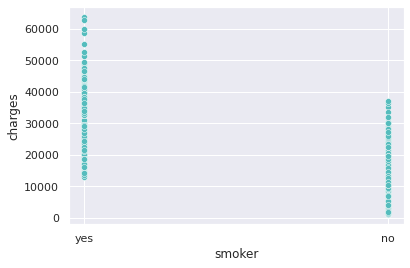

In [ ]:
sns.scatterplot(x=dataset['smoker'], y=dataset['charges'], color = "#55bcbd");

In [ ]:
conditions = [
    (dataset['bmi'] < 18.5) ,
    (dataset['bmi'] <= 24.9) & (dataset['bmi'] >= 18.5),
    (dataset['bmi'] <= 29.9) & (dataset['bmi'] > 24.9),
    (dataset['bmi'] > 29.9),
]




choices = ['underweight', 'normal', 'overweight', 'obese']


dataset["bmiGps"] = np.select(condlist=conditions, choicelist=choices)
# dataset.drop(["bmi"], axis=1, inplace=True)
dataset.head()

,age,sex,bmi,children,smoker,region,charges,bmiGps
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight


In [ ]:
ageconditions = [
    (dataset['age'] <= 35) & (dataset['age'] >= 18),
    (dataset['age'] <= 55) & (dataset['age'] > 35),
    (dataset['age'] > 55),
]




agechoices = ['young-adults', 'middle-aged-adults', 'elder-adults']


dataset["ageGps"] = np.select(condlist=ageconditions, choicelist=agechoices)
# dataset.drop(["bmi"], axis=1, inplace=True)
dataset.head()

,age,sex,bmi,children,smoker,region,charges,bmiGps,ageGps
0,19,female,27.900,0,yes,southwest,16884.92400,overweight,young-adults
1,18,male,33.770,1,no,southeast,1725.55230,obese,young-adults
2,28,male,33.000,3,no,southeast,4449.46200,obese,young-adults
3,33,male,22.705,0,no,northwest,21984.47061,normal,young-adults
4,32,male,28.880,0,no,northwest,3866.85520,overweight,young-adults


In [ ]:
BMIGPGP = dataset.groupby('bmiGps').size()
print(BMIGPGP)

bmiGps
normal         222
obese          716
overweight     380
underweight     20
dtype: int64


In [ ]:
agegpss = dataset.groupby('ageGps').size()
print(agegpss)

ageGps
elder-adults          216
middle-aged-adults    548
young-adults          574
dtype: int64


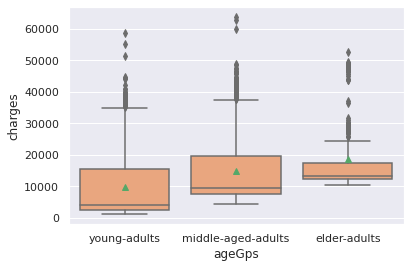

In [ ]:
sns.boxplot(x=dataset['ageGps'], y=dataset['charges'], color = "#fba26d",showmeans=True);

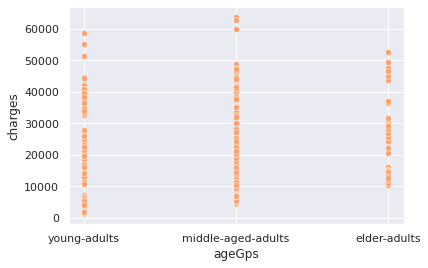

In [ ]:
sns.scatterplot(x=dataset['ageGps'], y=dataset['charges'], color = "#fba26d");

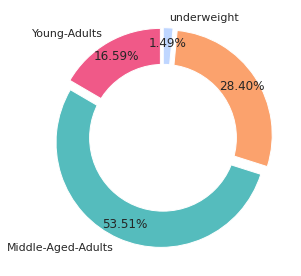

In [ ]:
# BMIGPGP.plot.pie()


# Pie chart
labels = ['Young-Adults', 'Middle-Aged-Adults', '', 'underweight']
sizes = [222, 716, 380, 20]
#colors
colors = ['#f05988','#55bcbd','#fba26d','#bfd6ff']
#explsion/
explode = (0.05,0.05,0.05,0.05)

plt.pie(sizes, colors = colors, labels=labels, startangle=90, autopct='%1.2f%%',pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
# ax1.axis('equal')
plt.tight_layout()
plt.show()



In [ ]:
sns.scatterplot(x=dataset['bmiGps'], y=dataset['charges'], color = "#f05988");

KeyError: ignored

In [ ]:
# BMIGPGP.plot.pie()


# Pie chart
labels = ['normal', 'obese', 'overweight', 'underweight']
sizes = [222, 716, 380, 20]
#colors
colors = ['#f05988','#55bcbd','#fba26d','#bfd6ff']
#explsion
explode = (0.05,0.05,0.05,0.05)

plt.pie(sizes, colors = colors, labels=labels, startangle=90, autopct='%1.2f%%',pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
# ax1.axis('equal')
plt.tight_layout()
plt.show()



In [ ]:
# One-hot encode the data using pandas get_dummies
# dataset = pd.get_dummies(dataset)
# dataset.describe()

from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
leRegion = LabelEncoder()
le.fit(dataset.sex.drop_duplicates())
dataset.sex = le.transform(dataset.sex)
# smoker or not
le.fit(dataset.smoker.drop_duplicates())
dataset.smoker = le.transform(dataset.smoker)
#region
leRegion.fit(dataset.region.drop_duplicates())
dataset.region = leRegion.transform(dataset.region)
#bmi group
le.fit(dataset.bmiGps.drop_duplicates())
dataset.bmiGps = le.transform(dataset.bmiGps)
#age group
le.fit(dataset.ageGps.drop_duplicates())
dataset.ageGps = le.transform(dataset.ageGps)
dataset.describe()


,age,sex,bmi,children,smoker,region,charges,bmiGps,ageGps
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,1.147982,1.267564
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.698700,0.720577
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,1.000000,1.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,2.000000,2.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,3.000000,2.000000


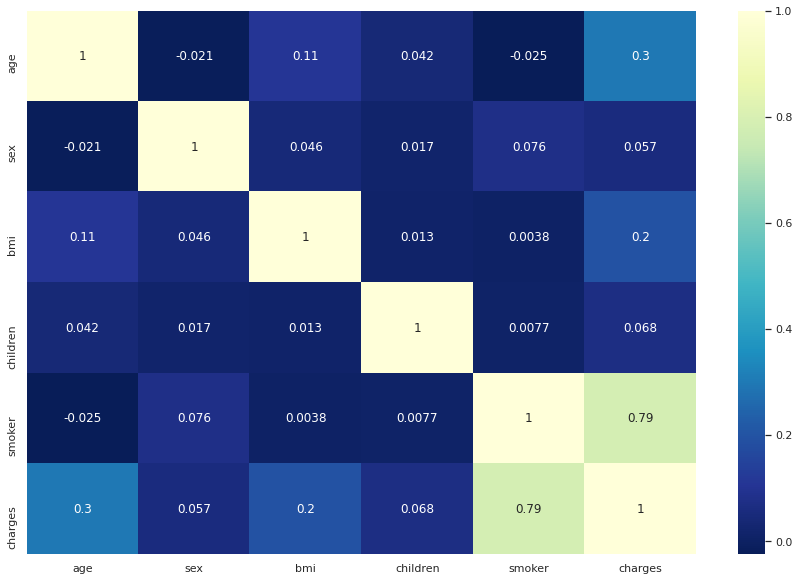

In [ ]:
plt.subplots(figsize=(15,10))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu_r')

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges,bmiGps
0,19,0,27.900,0,1,3,16884.92400,2
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,1
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,2


In [ ]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
names = dataset.columns
d = scaler.fit_transform(dataset)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,age,sex,bmi,children,smoker,region,charges,bmiGps,ageGps
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.251611,0.666667,1.0
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.009636,0.333333,1.0
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.053115,0.333333,1.0
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.333010,0.000000,1.0
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.043816,0.666667,1.0


In [ ]:
X = scaled_df.drop(["charges"], axis=1)

y = scaled_df.charges.values

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# quad = PolynomialFeatures (degree = 2)
# x_quad = quad.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1070, 7)
Training Labels Shape: (1070,)
Testing Features Shape: (268, 7)
Testing Labels Shape: (268,)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 1,n_jobs = -1)
rf.fit(train_features, train_labels);
# R2-Score of the model and mean_squared_error
print('R2 Score: {}'.format(r2_score(test_labels, rf.predict(test_features))))
print('Mean Squared Error: {}'.format(mean_squared_error(rf.predict(test_features),test_labels)))

R2 Score: 0.8754472277689695
Mean Squared Error: 0.005049905531281361


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
Lin_reg = LinearRegression()
Lin_reg.fit(train_features, train_labels)
print('R2 Score: {}'.format(r2_score(test_labels, Lin_reg.predict(test_features))))
print('Mean Squared Error: {}'.format(mean_squared_error(Lin_reg.predict(test_features),test_labels)))

R2 Score: 0.8004643900590711
Mean Squared Error: 0.008090032540257338


In [ ]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(train_features, train_labels)
print('R2 Score: {}'.format(r2_score(test_labels, Ridge.predict(test_features))))
print('Mean Squared Error: {}'.format(mean_squared_error(Ridge.predict(test_features),test_labels)))

R2 Score: 0.8003909898084899
Mean Squared Error: 0.008093008502371775


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
rf_model = RandomForestRegressor(random_state = 42)
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [2,3,5,7],
            'n_estimators' : [100, 200, 500, 1000, 1500]}

rf_cv_model = GridSearchCV(rf_model,
                           rf_params,
                           cv = 10,
                            n_jobs = -1,
                            verbose = 2)
rf_cv_model.fit(train_features, train_labels)

In [ ]:
rf_cv_model.best_params_

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
rf_model = RandomForestRegressor(random_state = 42)
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [2,3,5,7],
            'n_estimators' : [100, 200, 500, 1000, 1500]}

rf_cv_model = GridSearchCV(rf_model,
                           rf_params,
                           cv = 10,
                            n_jobs = -1,
                            verbose = 2)
rf_cv_model.fit(train_features, train_labels)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rf_tuned = RandomForestRegressor(max_depth= 5, max_features=7, n_estimators=1000)
rf_tuned.fit(train_features, train_labels);
# R2-Score of the model and mean_squared_error
print(r2_score(test_labels, rf_tuned.predict(test_features)))
print('R2 Score: {}'.format(r2_score(test_labels, rf_tuned.predict(test_features))))
print('Mean Squared Error: {}'.format(mean_squared_error(rf_tuned.predict(test_features),test_labels)))

0.897599999770475
R2 Score: 0.897599999770475
Mean Squared Error: 0.004151736796376664


Feature: age, Score: 11.11073
Feature: sex, Score: 0.05009
Feature: bmi, Score: 16.77971
Feature: children, Score: 1.00875
Feature: smoker, Score: 68.51043
Feature: region, Score: 0.34356
Feature: bmiGps, Score: 1.11792
Feature: ageGps, Score: 1.07882


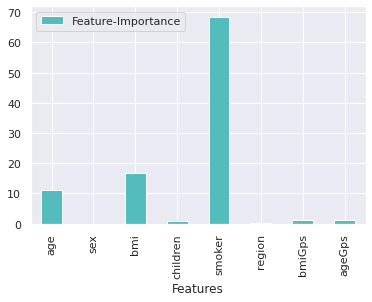

In [ ]:
featureImportance = pd.DataFrame()
for i,v in enumerate(rf_tuned.feature_importances_):
	print('Feature: %s, Score: %.5f' % (train_features.columns[i],v*100))
featureImportance["Feature-Importance"] = rf_tuned.feature_importances_*100
featureImportance["Features"] = train_features.columns
featureImportance.plot(x ='Features', y='Feature-Importance', kind = 'bar',color = "#55bcbd")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
gbm_model = GradientBoostingRegressor(random_state = 42)
gbm_params = {'max_depth': list(range(1,10)),
            'n_estimators' : [100, 200, 500, 1000, 1500]}

gbm_cv_model = GridSearchCV(gbm_model,
                           gbm_params,
                           cv = 10,
                            n_jobs = -1,
                            verbose = 2)
gbm_cv_model.fit(train_features, train_labels)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  4.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [ ]:
gbm_cv_model.best_params_

{'max_depth': 2, 'n_estimators': 100}

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(train_features, train_labels);
# R2-Score of the model and mean_squared_error
print('R2 Score: {}'.format(r2_score(test_labels, GBR.predict(test_features))))
print('Mean Squared Error: {}'.format(mean_squared_error(GBR.predict(test_features),test_labels)))

R2 Score: 0.8979727648079054
Mean Squared Error: 0.004136623297169306


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(max_depth= 2,  n_estimators=100)
GBR.fit(train_features, train_labels);
# R2-Score of the model and mean_squared_error
print('R2 Score: {}'.format(r2_score(test_labels, GBR.predict(test_features))))
print('Mean Squared Error: {}'.format(mean_squared_error(GBR.predict(test_features),test_labels)))


NameError: ignored

In [ ]:
X2 = scaled_df.drop(["charges", "sex", "region", "bmiGps", "children"], axis=1)
print(X2)

           age       bmi  smoker
0     0.021739  0.321227     1.0
1     0.000000  0.479150     0.0
2     0.217391  0.458434     0.0
3     0.326087  0.181464     0.0
4     0.304348  0.347592     0.0
...        ...       ...     ...
1333  0.695652  0.403820     0.0
1334  0.000000  0.429379     0.0
1335  0.000000  0.562012     0.0
1336  0.065217  0.264730     0.0
1337  0.934783  0.352704     1.0

[1338 rows x 3 columns]


In [ ]:
from sklearn.model_selection import train_test_split
train_features2, test_features2, train_labels2, test_labels2 = train_test_split(X2, y, test_size=0.2, random_state=0)

In [ ]:
# Reducing Features RF
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rf_tuned = RandomForestRegressor(max_depth= 5, max_features=3, n_estimators=1000)
rf_tuned.fit(train_features2, train_labels2);
# R2-Score of the model and mean_squared_error
print('R2 Score: {}'.format(r2_score(test_labels2, rf_tuned.predict(test_features2))))
print('Mean Squared Error: {}'.format(mean_squared_error(rf_tuned.predict(test_features2),test_labels2)))

NameError: ignored

In [ ]:
# Reducing Features XGBOOST
from xgboost import XGBRegressor
xgb_model = XGBRegressor(colsample_bytree=1,
 learning_rate=0.01,
 max_depth=3,
 n_estimators=500)
xgb_model.fit(train_features2, train_labels2);
# R2-Score of the model and mean_squared_error
print('R2 Score: {}'.format(r2_score(test_labels2, xgb_model.predict(test_features2))))
print('Mean Squared Error: {}'.format(mean_squared_error(xgb_model.predict(test_features2),test_labels2)))

[08:22:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score: 0.8943464987021724
Mean Squared Error: 0.004283647734580237


In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(train_features, train_labels);
# R2-Score of the model and mean_squared_error
print('R2 Score: {}'.format(r2_score(test_labels, xgb_model.predict(test_features))))
print('Mean Squared Error: {}'.format(mean_squared_error(xgb_model.predict(test_features),test_labels)))

[09:08:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score: 0.897890477609258
Mean Squared Error: 0.004139959574412757


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
xgb = XGBRegressor()
xgb_params = {'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]}

xgb_cv_model = GridSearchCV(xgb_model,
                           xgb_params,
                           cv = 10,
                            n_jobs = -1,
                            verbose = 2)
xgb_cv_model.fit(train_features, train_labels)

In [ ]:
xgb_cv.best_params_

In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(colsample_bytree=1,
 learning_rate=0.01,
 max_depth=3,
 n_estimators=500)
xgb_model.fit(train_features, train_labels);
# R2-Score of the model and mean_squared_error
print('R2 Score: {}'.format(r2_score(test_labels, xgb_model.predict(test_features))))
print('Mean Squared Error: {}'.format(mean_squared_error(xgb_model.predict(test_features),test_labels)))

[14:02:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score: 0.9000341544037777
Mean Squared Error: 0.004053045689574897


In [ ]:
from sklearn.svm import SVR
svm = SVR(kernel = 'rbf')
svm.fit(train_features, train_labels);
# R2-Score of the model and mean_squared_error
print('R2 Score: {}'.format(r2_score(test_labels, svm.predict(test_features))))
print('Mean Squared Error: {}'.format(mean_squared_error(svm.predict(test_features),test_labels)))

R2 Score: 0.7529408172226317
Mean Squared Error: 0.010016842751176097


Feature: age, Score: 4.26921
Feature: sex, Score: 0.20522
Feature: bmi, Score: 8.53609
Feature: children, Score: 0.80288
Feature: smoker, Score: 85.06747
Feature: region, Score: 0.63015
Feature: bmiGps, Score: 0.48899
Feature: ageGps, Score: 0.00000


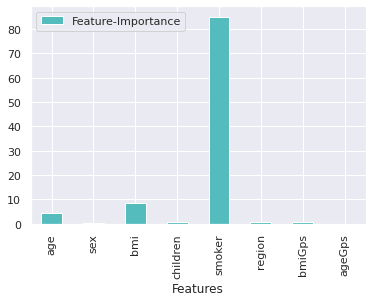

In [ ]:
featureImportance = pd.DataFrame()
for i,v in enumerate(xgb_model.feature_importances_):
	print('Feature: %s, Score: %.5f' % (train_features.columns[i],v*100))
featureImportance["Feature-Importance"] = xgb_model.feature_importances_*100
featureImportance["Features"] = train_features.columns
featureImportance.plot(x ='Features', y='Feature-Importance', kind = 'bar',color = "#55bcbd")
plt.show()

In [ ]:
# import numpy as np
# from hyperopt import hp, tpe, fmin,STATUS_OK,Trials
# def accuracy_model(params):
#    clf = RandomForestClassifier(**params)
#    return cross_val_score(clf, X_train, y_train).mean()
# param_space = {'max_depth': hp.choice('max_depth', range(10,100)),
# 'max_features': hp.uniform('max_features', 0.1,1),
# 'n_estimators': hp.choice('n_estimators', range(50,500)),
# 'min_samples_leaf': hp.choice('min_samples_leaf',range(3,5)),
# 'min_samples_split': hp.choice('min_samples_split',range(2,10)),
# 'criterion': hp.choice('criterion', ["gini", "entropy"])}
# best = 0
# def f(params):
#     global best
#     acc = accuracy_model(params)
#     if acc > best:
#        best = acc
#     return {'loss': -acc, 'status': STATUS_OK}
# Trials = Trials()
# best_params = fmin(f, param_space , algo=tpe.suggest,max_evals=500, trials= Trials)
# print('New best:', best, best_params)
# print(best_params)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(train_features, train_labels);
# R2-Score of the model and mean_squared_error
print('R2 Score: {}'.format(r2_score(test_labels, knn.predict(test_features))))
print('Mean Squared Error: {}'.format(mean_squared_error(knn.predict(test_features),test_labels)))





R2 Score: 0.8594474981546114
Mean Squared Error: 0.005698603441663348


In [ ]:
# ???
from sklearn.linear_model import LassoCV
lasso = LassoCV()
lasso.fit(train_features, train_labels);
# R2-Score of the model and mean_squared_error
print('R2 Score: {}'.format(r2_score(test_labels, lasso.predict(test_features))))
print('Mean Squared Error: {}'.format(mean_squared_error(lasso.predict(test_features),test_labels)))

R2 Score: 0.8004157078100702
Mean Squared Error: 0.008092006328187554


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 128, activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 64, activation = 'relu'))

classifier.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, activation = 'linear'))

# Compiling the ANN
classifier.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
History = classifier.fit(x = train_features, y = train_labels, batch_size = 128, epochs = 150, verbose = 0)

In [ ]:
print('R2 Score: {}'.format(r2_score(test_labels, classifier.predict(test_features))))
print('Mean Squared Error: {}'.format(mean_squared_error(classifier.predict(test_features),test_labels)))

R2 Score: 0.8981750758936964
Mean Squared Error: 0.004128420734890881


In [ ]:
def buildModel(optimizer):
    # Initialising the ANN
    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 128, activation = 'relu'))

    # Adding the second hidden layer
    classifier.add(Dense(units = 64, activation = 'relu'))


    classifier.add(Dense(units = 32, activation = 'relu'))

    # Adding the output layer
    classifier.add(Dense(units = 1, activation = 'linear'))

    # Compiling the ANN
    classifier.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mean_absolute_error'])

    return classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

classifier = KerasRegressor(build_fn = buildModel)
#What hyperparameter we want to play with
parameters = {'batch_size': [16, 32, 64, 128],
              'epochs': [100, 150],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'neg_mean_absolute_error',
                           cv = 5)
grid_search = grid_search.fit(train_features, train_labels, verbose = 0)

In [ ]:
grid_search.best_params_

{'batch_size': 16, 'epochs': 100, 'optimizer': 'adam'}

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 128, activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 64, activation = 'relu'))

classifier.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, activation = 'linear'))

# Compiling the ANN
classifier.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
History = classifier.fit(x = train_features, y = train_labels, batch_size = 16, epochs = 100, verbose = 0)
print('R2 Score: {}'.format(r2_score(test_labels, classifier.predict(test_features))))
print('Mean Squared Error: {}'.format(mean_squared_error(classifier.predict(test_features),test_labels)))

R2 Score: 0.8912586648472656
Mean Squared Error: 0.00440884181082808


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 128, activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 64, activation = 'relu'))

classifier.add(Dense(units = 32, activation = 'relu'))

classifier.add(Dense(units = 4, activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, activation = 'linear'))

# Compiling the ANN
classifier.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
History = classifier.fit(x = train_features, y = train_labels, batch_size = 16, epochs = 100, verbose = 0)
print('R2 Score: {}'.format(r2_score(test_labels, classifier.predict(test_features))))
print('Mean Squared Error: {}'.format(mean_squared_error(classifier.predict(test_features),test_labels)))

R2 Score: 0.8980683779027466
Mean Squared Error: 0.004132746730732021


In [ ]:
# Reducing Featuews to 3
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 128, activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 64, activation = 'relu'))

classifier.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, activation = 'linear'))

# Compiling the ANN
classifier.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
History = classifier.fit(x = train_features2, y = train_labels2, batch_size = 16, epochs = 100, verbose = 0)
print('R2 Score: {}'.format(r2_score(test_labels2, classifier.predict(test_features2))))
print('Mean Squared Error: {}'.format(mean_squared_error(classifier.predict(test_features2),test_labels2)))

R2 Score: 0.895794461894242
Mean Squared Error: 0.004224941073927508


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

def get_models():
  models = dict()
  models['rf'] = RandomForestRegressor(max_depth= 5, max_features=7, n_estimators=1000)
  models['ridge'] = Ridge(alpha=0.5)
  models['gbr'] = GradientBoostingRegressor(max_depth= 2,  n_estimators=100)
  models['knn'] = KNeighborsRegressor()
  models['stacking'] = get_stacking()
  return models

In [ ]:
from sklearn.metrics import r2_score

def evaluate_model(model, train_features, train_labels):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, train_features, train_labels, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
	return scores

>rf 0.840 (0.027)
>ridge 0.732 (0.022)
>gbr 0.846 (0.023)
>knn 0.795 (0.033)
>stacking 0.846 (0.024)


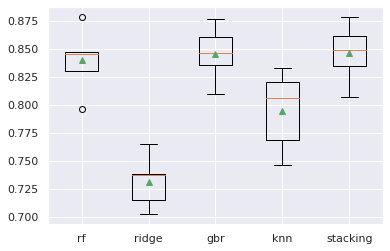

In [ ]:
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, train_features, train_labels)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
from sklearn.ensemble import StackingRegressor
# get a stacking ensemble of models
def get_stacking():
  level0 = list()
  level0.append(('rf', RandomForestRegressor(max_depth= 5, max_features=7, n_estimators=1000)))
  level0.append(('ridge',Ridge(alpha=0.5)))
  level0.append(('gbr', GradientBoostingRegressor(max_depth= 2,  n_estimators=100)))
  level0.append(('knn', KNeighborsRegressor()))
	# define meta learner model
  level1 = LinearRegression()
	# define the stacking ensemble
  model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
  return model

[0.7190079741095514, 0.8200185437392163, 0.8079089980432493, 0.2815883878932762, -1.3622408674285545e+19]


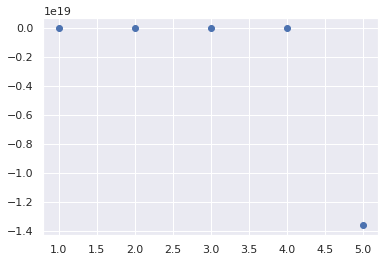

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.model_selection import RepeatedKFold
def create_polynomial_regression_model(degree):
 poly_features = PolynomialFeatures(degree=degree)
 X_poly = poly_features.fit_transform(train_features)
 poly = LinearRegression()
 cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 crossRes = cross_val_score(poly, X_poly, train_labels, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
 return np.mean(crossRes)
poly_cv = []
for i in range(1,6):
 poly_cv.append(create_polynomial_regression_model(i))
plt.scatter(range(1,6),poly_cv)
print(poly_cv)

In [ ]:
# CATBOOST
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
cb_model = ctb.CatBoostRegressor(verbose=False)
cb_params = {'iterations': [100, 150, 200],
        'learning_rate': [0.001,0.03,0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

cb_cv_model = GridSearchCV(cb_model,
                           cb_params,
                           cv = 10,
                            n_jobs = -1,
                            verbose = 2)
cb_cv_model.fit(train_features, train_labels)
cb_cv_model.best_params_. :  {'depth': 4, 'iterations': 200, 'l2_leaf_reg': 0.2, 'learning_rate': 0.03}

SyntaxError: ignored

In [ ]:
س# ADABOOST
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
cb_model = AdaBoostRegressor()
cb_params = {'n_estimators' : [100, 200, 500, 1000, 1500],
        'learning_rate':[0.001,0.01,0.1,1, 2,5,10,30],
}

cb_cv_model = GridSearchCV(cb_model,
                           cb_params,
                           cv = 10,
                            n_jobs = -1,
                            verbose = 2)
cb_cv_model.fit(train_features, train_labels)
{'learning_rate': 0.001, 'n_estimators': 100}